In [1]:
import numpy as np
import IPython
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
#import matplotlib.cm as cm
import pandas as pd
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Results from experiment F98: SQUIDs and Noise Thermometers

#### Authors: Huth, Paris and Coc, Q'inich

## 5.1 Preparation

In this part of the experiment, we measure the resistance $R$ of $\pm V$, $\pm \phi$, $\pm \phi_X$ and $\pm I$ for channel 1 and chanel 2 at two temperatures. Room temperature $T_{room}$ and the temperature in liquid helium $T_{He}$.  Chanel two is connected to a single stage SQUID while Channel 2 is Connected to a two-stage SQUID. 

Tab. 1: Resistance of Channel 1
| Channel 1    | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | 364.0                    | 8.7                    |
| $\pm \phi$   | O.L                      | O.L                    |
| $\pm \phi_X$ | 259.0                    | 6.9                    |
| $\pm I$ | O.L                      | O.L                     

    |



Tab. 2 Resistance of Channel 2

| Channel 2   | $R(T_{room})$ [$\Omega$] | $R(T_{He})$ [$\Omega$] |
|--------------|---------------------------|-------------------------|
| $\pm V$      | N.A                       | 56.9                   |
| $\pm \phi$   | N.A                       | 7.4                    |
| $\pm \phi_X$ | N.A                       | 8.1                    |
| $\pm I$      | N.A                       | 7.1                   |

Since Channel 1 is only a single-stage SQUID the the value for $\pm \phi$ and $\pm I$ are not defined. From the values displayed in Tab. 1 it becomes clear, that the resistance decreases significantly - 97.6% in the case of  $\pm V$ and 99.97% for $\pm \phi_X$. 

During the experiment there were some misunderstanding and we didn't measure the resistance of Channel 2 at room temperature. Regardless, we can assume the values between Channel 1 and Chanel 2 to be of the same magnitude. With this assumption, we can conclude that the resistance drops drastically at low temperatures, see Tab. 2, and the reduction should be similar to the one observed for Channel 1.

Both observations fall within our expectations. From the theory of super conductors, we expect the resistance to tend to zero $R \to 0$ for $T \to T_{critical}$. However, in our experimental set-up we deal with a non-ideal scenario, since the cables used to take the measurements have a resistance themselves. Consequently, the resistance does not reach 0, but drops substantially compared to the initial value $R\left(T_{room}\right)$. 


## 5.2 Single Stage SQUID

### 5.2.1 Open Loop

Throughout this part we will work with a single stage SQUID and study its properties. In this part, we focus in the current-voltage characteristic in the open loop setting. In Fig. 1 we present a screenshot of the signal measured with $\texttt{PicoScope}$ and the parameters used for the measurement. 

Fig. 1: Measured current-voltage characteristic
![Measured current-volta characteristic](Measurements/5.2/V_I_Ib=50.png)


From this measurements we aim to find the critical current $I_c$ which characterize the current at which breaks the Cooper-pairs inside of the super conductor, leading to the normal conducting behaviour of the material.  Additionally, we are interested to estimate the resistance of a normal conducting Josephson junction. We utilze the
fact, that a normal conducting Josephson junction follows Ohm's law:

$$U(I) = G_N I$$

For this reason, we performe a linear fit along the linear range of the voltage-current characteristic to determine the normal resistance $G_N$.

In [426]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.2/V_I_Ib=50/V_I_Ib=50_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A    Channel B
            (ms)          (V)         (mV)
0  -100,00896454  -0,17375120  63,17667000
1  -100,00080454  -0,17375120  59,22428000
2   -99,99264454  -0,17375120  55,27190000
3   -99,98448454  -0,17375120  59,22428000
4   -99,97632454  -0,17375120  55,27190000

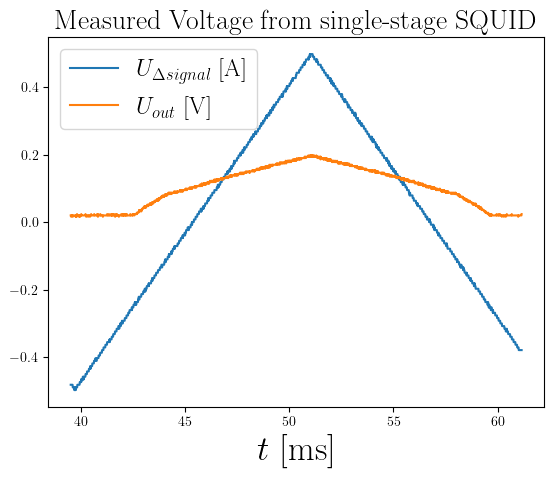

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 0.0199


In [428]:
#Convert values into floats
%matplotlib inline
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
current= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]

signal = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal = signal/1000 #V

t_i = 17100
t_f = 19750
plt.plot(time[t_i:t_f],current[t_i:t_f], label =r"$U_{\Delta signal}$ [A]")
plt.plot(time[t_i:t_f],signal[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Measured Voltage from single-stage SQUID", fontsize =20)
#plt.ylabel(r"$I$ [A]", fontsize = 20)
plt.xlabel(r"$t$ [ms]", fontsize = 25)

plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(current[t_i:t_f]), np.min(current[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(current[t_i:t_f]) -np.min(current[t_i:t_f])))
print(r"R = {:.3}".format((np.max(current[t_i:t_f]) -np.min(current[t_i:t_f]))/50))

We passed a triangular current voltage with peak-to-peak $50$ $\mu$ A. From the measured voltage generated by the in-put current, we measure $U_{peak-to-peak} = 0.995$ v. Using Ohm'w law, we find $R = 0.0199$ M $\Omega$. For the rest of the analysis we thus multiplied the measured voltage from channel 1 with $R$. In order to get the right scale, it is important to consider the $1/2$ offset of the input signal. Additionally, we have to consider the fact that the output signal $U_{out}$ is being amplified by a factor of $2000$. After making these changes to the measurements we are able to plot the voltage-current characteristic of the single-stage SQUID in the open loop mode.

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\magnu\AppData\Local\Temp\ipykernel_48860\4135830471.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(title = "$I_N$ = {:.3} $\mu$A".format(current[17670]), fontsize='xx-large', loc = 'best', title_fontsize='xx-large')


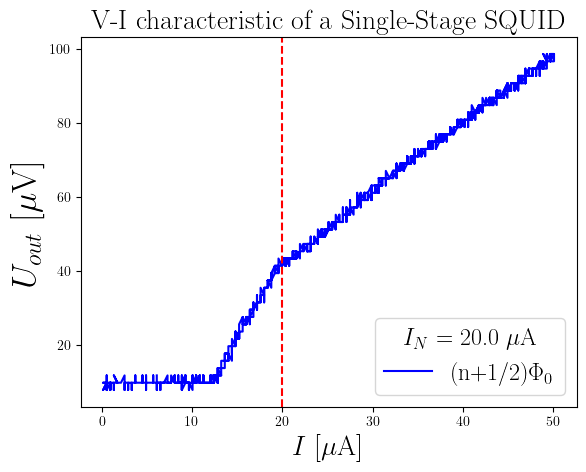

In [431]:
t_i = 17100
t_f = 19750
R = 0.995/50e-6  #Ohm 
a = 2000 # Verstärkung
current = (current + 0.5*np.ones_like(current))/R*10**6 #muA
signal = signal/a*10**6 #muV
plt.plot(current[t_i:t_f],signal[t_i:t_f], label = r"(n+1/2)$\Phi_0$", color = "blue")
plt.axvline(current[17670], ls = '--', color='red')
plt.title(r"V-I characteristic of a Single-Stage SQUID", fontsize =20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$U_{out}$ [$\mu$V]", fontsize = 25)
plt.legend(title = "$I_N$ = {:.3} $\mu$A".format(current[17670]), fontsize='xx-large', loc = 'best', title_fontsize='xx-large')
plt.savefig("v_i_characteristic_ssSQUID.png")
plt.show()


After estimating the linear range of the U-I curve, we move on and perform a fit using the $\texttt{Minuit}$ package. Since the measured data-set lacks from uncertainties, we assume that all residues are equally weighed, i.e. $\sigma = 1$ for all data-points.

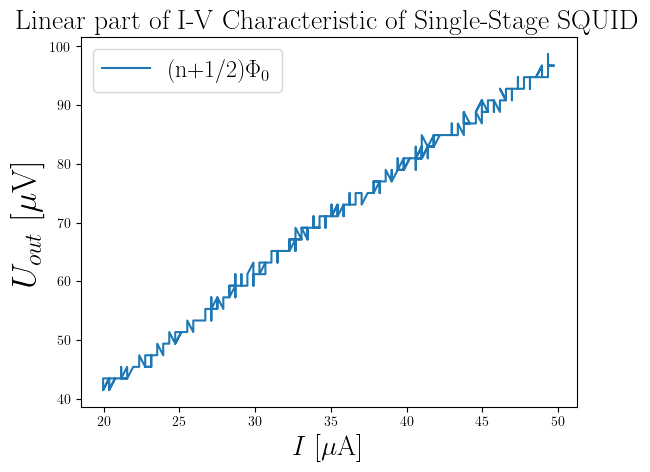

In [414]:
# plot signal
t_i = 17670
t_f = 18500
plt.plot(current[t_i:t_f],signal[t_i:t_f], label =r"(n+1/2)$\Phi_0$")
plt.title(r"Linear part of I-V Characteristic of Single-Stage SQUID", fontsize=20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$U_{{out}}$ [$\mu$V]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [416]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
current_fit = current[t_i:t_f]
signal_fit = signal[t_i:t_f]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t0+t1*x

chi_2 = cost.LeastSquares(current_fit, signal_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=103, t1=1.9)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 906.5 (χ²/ndof = 1.1)      │              Nfcn = 67               │
│ EDM = 9.54e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   4.41    │   0.14    │   -0.14    │    0.14    │         │         │       │
│ 1 │ t1   │   1.888   │   0.004   │   -0.004   │   0.004    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.14   │   0.14    │  -0.004   │   0.004   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────┐
│    │        t0        t1 │
├────┼─────────────────────┤
│ t0 │    0.0207 -0.562e-3 │
│ t1 │ -0.562e-3  1.62e-05 │
└────┴─────────────────────┘

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_48860\241515572.py:10: SyntaxWarning: invalid escape sequence '\p'
  label='linear Fit: \n $G_{{N}}$ = ({:.3f} $\pm$ 0.004) $\Omega$ '.format(t1_fit),


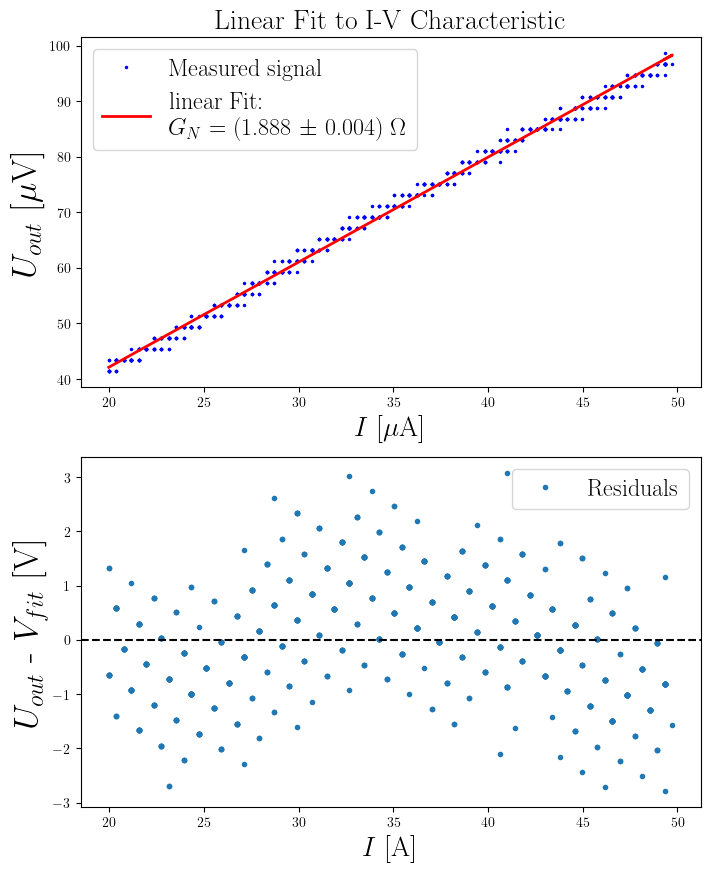

In [433]:
# Plot the data and the fitted model
import matplotlib.pyplot as plt
%matplotlib inline
t0_fit, t1_fit = minuit.values['t0'], minuit.values['t1']
fig, axs = plt.subplots(2, 1, figsize=(8,10))


axs[0].plot(current_fit, signal_fit,'b.', markersize=3, label = "Measured signal")
axs[0].plot(current_fit, linear(current_fit, t0_fit, t1_fit), '-', 
            label='linear Fit: \n $G_{{N}}$ = ({:.3f} $\pm$ 0.004) $\Omega$ '.format(t1_fit), 
            linewidth=2, color = "red")
axs[0].set_title(r"Linear Fit to I-V Characteristic", fontsize=20)
axs[0].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[0].set_ylabel(r"$U_{{out}}$ [$\mu$V]", fontsize=25)
axs[0].legend(fontsize='xx-large', loc='best')
#axs[0].grid(True)


#plot residuals
residuals = signal_fit - linear(current_fit, t0_fit, t1_fit)
axs[1].plot(current_fit, residuals, 'o', label="Residuals", markersize=3)
axs[1].axhline(0, color='black', linestyle='--')
#axs[1].set_title("Residuals of the Linear Fit", fontsize=20)
axs[1].set_xlabel(r"$I$ [A]", fontsize = 20)
axs[1].set_ylabel(r"$U_{{out}}$ - $V_{fit}$ [V]", fontsize=25)
axs[1].legend(fontsize='xx-large', loc='best')
#axs[1].grid(True)
plt.savefig("v_i_characteristic_ssSQUID_fit.png")
plt.show()


We find that the resistance of a normal conducting Josephson Junction is:
$$G_N = ( 3.776 \pm 0.004)\, \Omega $$

Additionally, we find the critical current to be $$I_c = 20\,\,\mu\textrm{A}$$


In the next part of the experiment, we measure the voltage-flux characteristics of the single stage SQUID remaning in the open loop set-up. In Fig. 2 we present the measured singal for $\Phi_B$ and $\Phi_x$ along with the parameters we use to take the measurement. Here, $I_B$ is selected to maximaze the voltage swing (in $\mu$V) and $V_{B}$ to center the signal $V_{out}$ around 0 V. 

Fig. 2: Signal measured for (left) $V-\Phi_X$ characteristic and (right) Measured $V-\Phi_B$ characteristic and their parameters.
<div>
    <img src="Measurements/5.2/V_PhiX_max.png" alt="V_PhiB_Max.png"  width="45%" />
    <img src="Measurements/5.2/V_PhiB_Max.png" alt="V_PhiB_Max.png"  width="45%" />
</div>v>


From the measured characteristics we aim to determine the inverse mutual inductance $M_{IN}^{-1}$,  $M_{\Phi_X}^{-1}$ and $M_{\Phi_B}^{-1}$. For this we use the know relations in Eq. 48 form the lab introduction. 
$$\Delta \Phi_i = I_i \cdot M$$
By measuring the difference between neighbouring flux quanta we get the relation:
$$M^{-1} = \frac{\Delta I_i}{\Phi_0}$$

From the measured flux-voltage characteristic we can find the voltage swing between the minima and maxima, which represent the flux change of one flux quantum $\Phi_0  = 2.067 \cdot 10^{-15}$ Vs. 

In [74]:
phi_0 = 2.067e-15 #Vs

In [500]:
#create a dataframe of saves file using pandas
data_phi = pd.read_csv("Measurements/5.2/V_PhiB/V_PhiB_1.csv", sep = ";", skiprows=[2], header=[0,1])
data_phi.head()

Time    Channel A    Channel B
           (ms)          (V)         (mV)
0  -23,85100722  -0,11844860  -4,75055300
1  -23,84895922  -0,11844860  -4,35531500
2  -23,84691122  -0,11844860  -3,95853800
3  -23,84486322  -0,11844860  -4,35531500
4  -23,84281522  -0,11844860  -4,75055300

In [502]:
data_phix = pd.read_csv("Measurements/5.2/V_PhiX_1/V_PhiX_1.csv", sep = ";", skiprows=[2], header=[0,1])
data_phix.head()

Time    Channel A    Channel B
           (ms)          (V)         (mV)
0  -95,40671855  -0,42645790  13,85796000
1  -95,39855855  -0,42645790  14,25320000
2  -95,39039855  -0,42645790  14,25320000
3  -95,38223855  -0,42645790  14,25320000
4  -95,37407855  -0,42645790  15,44199000

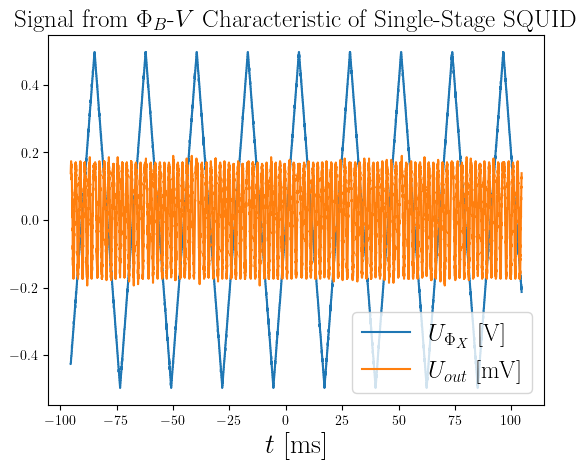

flux_X,max = 0.498; flux_X,min = -0.498
U_peak-to-peak = 0.995
R = 0.00829


In [510]:
%matplotlib inline
#Convert values into floats
time_X = data_phix.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_X= data_phix.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_X = data_phix.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal_X = signal_X/100#V
t_i = 0
t_f = -1

plt.plot(time_X[t_i:t_f],flux_X[t_i:t_f], label =r"$U_{\Phi_X}$ [V]")
plt.plot(time_X[t_i:t_f],signal_X[t_i:t_f], label =r"$U_{out}$ [mV]")
plt.title(r"Signal from $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", fontsize =18)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(r"flux_X,max = {:.3}; flux_X,min = {:.3}".format(np.max(flux_X[t_i:t_f]), np.min(flux_X[t_i:t_f])))
print(r"U_peak-to-peak = {:.3}".format(np.max(flux_X[t_i:t_f]) -np.min(flux_X[t_i:t_f])))
print(r"R = {:.3}".format((np.max(flux_X[t_i:t_f]) -np.min(flux_X[t_i:t_f]))/120))

Since we are interested in the change of flux given by a change in current we perfome the same calculations to transform the input voltage into the applied current. Here, it is essential to consider the amplification of the output signal and the offset of the input current. 

We know that the distance $\Delta t$ from maxima to maxima is the time change of an increase in a flux quanta, since we are interested to measure the change of flux in multiples of $\Phi_0$ we normalize the x-axis in our following plots. This normalization represent a affine transformation:
$$ x \to x' = x/\Delta t.$$
Since, both the input current and the output voltage are functions of the transformed x-axis we apply the respective transformation formula:
$$f(x) \to \Delta t \cdot f(x').$$


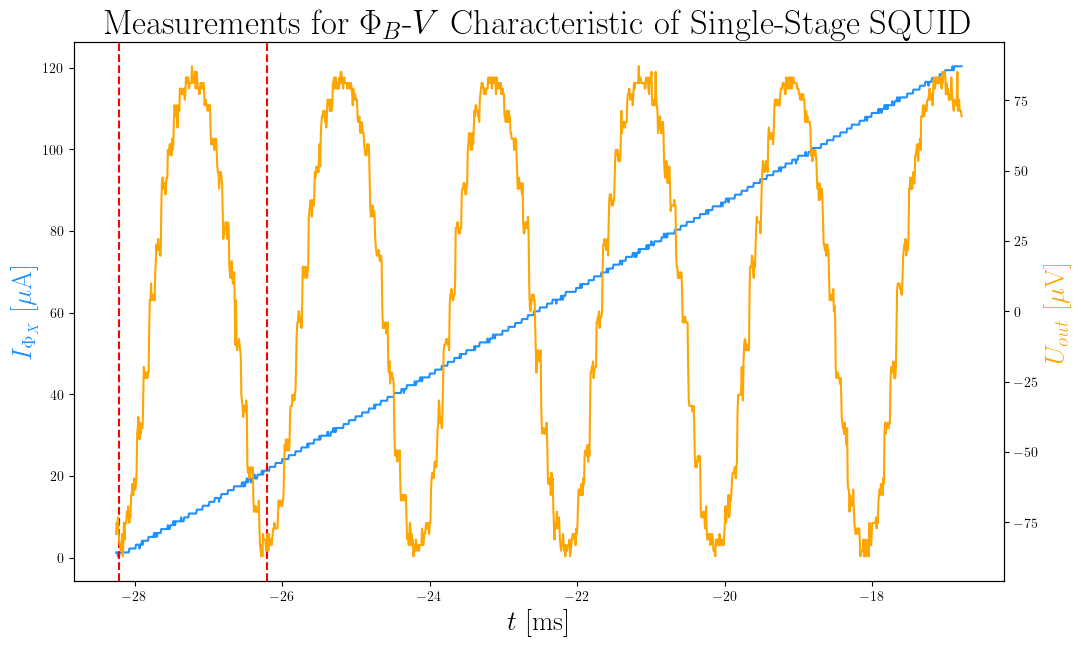

In [473]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
t_i = 8230
t_f = 9635

R = 0.995/120e-6 #Ohm
current = (flux_X + 0.5*np.ones_like(flux_X))/R*10**6
#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_X[t_i:t_f], 2)[:2]
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] #shift the found values to match the position
#of the minima visually. 
dt_X  = t_2 - t_1 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measurements for $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_X[t_i:t_f],current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')

ax.set_xlabel(r'$t$ [ms]', size = 20)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 20, color="dodgerblue")
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_X[t_i:t_f],signal_X[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")

plt.show()

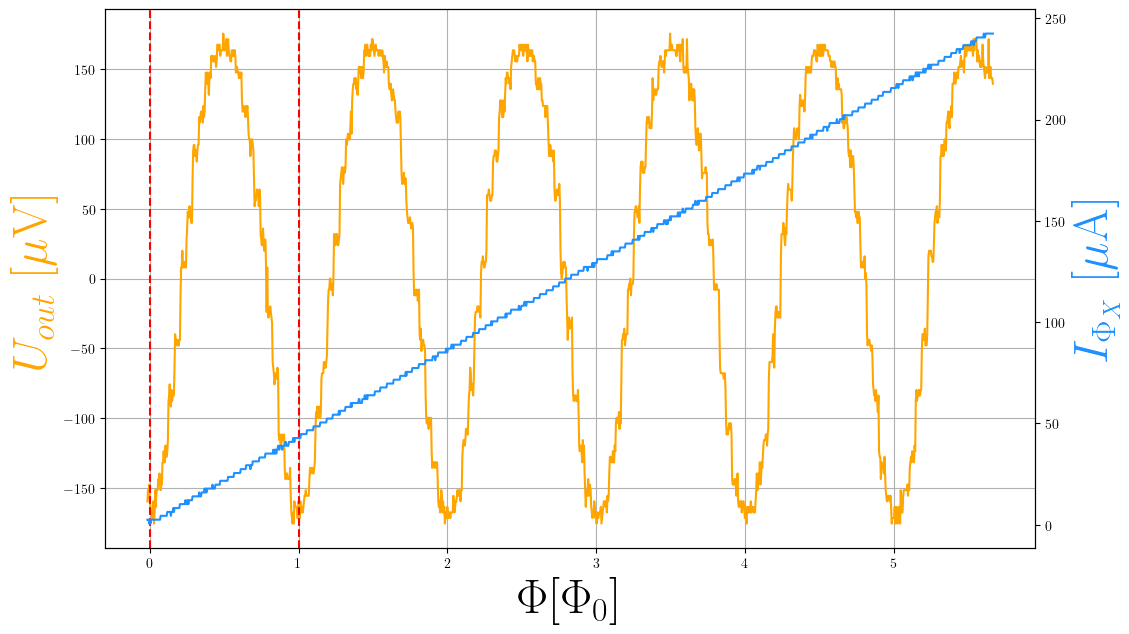

5.672066090417699


In [474]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
t_i = 8230
t_f = 9635

R = 0.995/120e-6 #Ohm

#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_X[t_i:t_f], 2)[:2]
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
dt_X  = t_2 - t_1 
time_X = time_X/dt_X #normalize x-Axis
time_X = time_X +14 #shift x-axis to center signal around 0
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
#plt.title(r"$\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_X[t_i:t_f],dt_X*signal_X[t_i:t_f]/a*10**6, color="orange")
ax.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 35, color="orange")

ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')
ax.grid()
ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 35)


ax2 = ax.twinx()
ax2.plot(time_X[t_i:t_f],dt_X*current[t_i:t_f], color="dodgerblue")
ax2.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 35, color="dodgerblue")
plt.savefig("phiB_V_characteristic.png")
plt.show()
print(time_X[t_f])

Now, using Eq. 47 can determine the inverse mutual inductace with a linear fit to $I(\Phi)$. We do this once again using Minuit and assuming $\sigma = 1$ for all data points.

In [462]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
time_fit = time_X[t_i:t_f]
current_fit = dt_X*current[t_i:t_f] 
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t1,t0):
    return t1*x+t0

chi_2 = cost.LeastSquares(time_fit, current_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t1=0,t0=0)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 166.2 (χ²/ndof = 0.1)      │              Nfcn = 77               │
│ EDM = 9.53e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t1   │  21.320   │   0.016   │   -0.016   │   0.016    │         │         │       │
│ 1 │ t0   │ -1.4921e3 │ 0.0012e3  │ -0.0012e3  │  0.0012e3  │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t1           │          t0           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.016   │   0.016   │   -1.2    │    1.2    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────┐
│    │        t1        t0 │
├────┼─────────────────────┤
│ t1 │  0.000264 -19.22e-3 │
│ t0 │ -19.22e-3       1.4 │
└────┴─────────────────────┘

From the fit we are able to determine:
$$M^{-1}_{\Phi_B} = (43.101\pm 0.008)\,\,\mu \textrm{A}\Phi_0^{-1} .$$

Next, we repeat the same procedure to estimate $M^{-1}_{IN}$. 

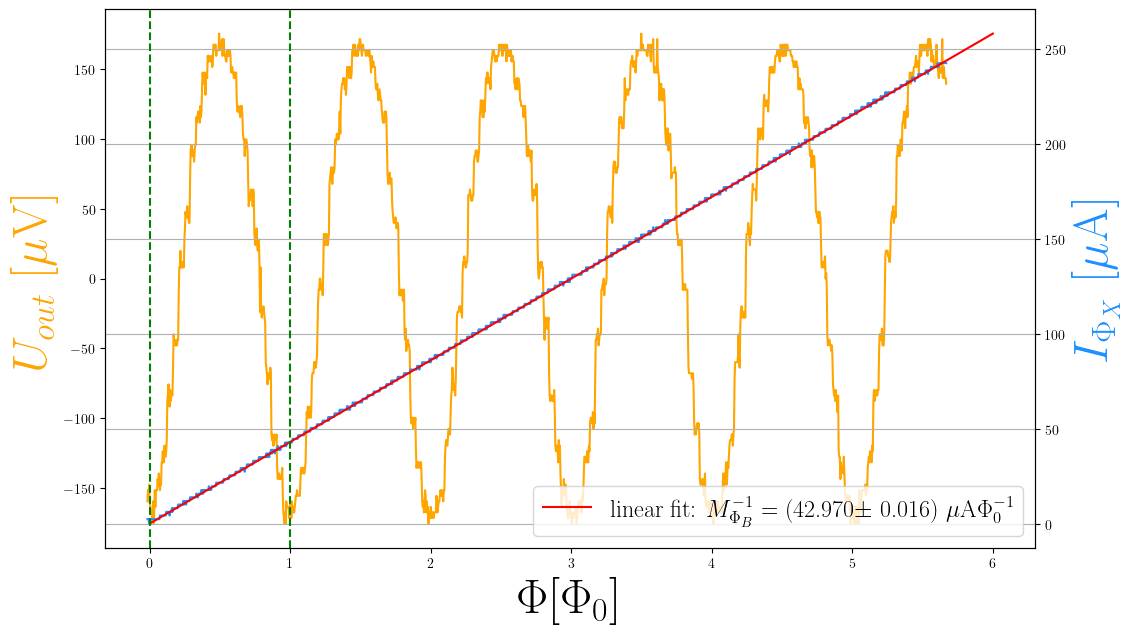

5.672066090417699


In [465]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
t_i = 8230
t_f = 9635

R = 0.995/120e-6 #Ohm
time_X = data_phix.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_X[t_i:t_f], 2)[:2]
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
dt_X  = t_2 - t_1 
time_X = time_X/dt_X #normalize x-Axis
time_X = time_X +14 #shift x-axis to center signal around 0
t_1, t_2 = time_X[t_i -7+ min_ind[0]], time_X[t_i +10+ min_ind[1]] 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
#plt.title(r"$\Phi_X$-$V$ Characteristic of Single-Stage SQUID", size = 25)
#ax.axvline(c[time1_X], ls = '--')
ax.plot(time_X[t_i:t_f],dt_X*(signal_X[t_i:t_f]/a*10**6), color="orange")
ax.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 35, color="orange")
ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 35)

ax2 = ax.twinx()
ax2.plot(time_X[t_i:t_f],dt_X*current[t_i:t_f], color="dodgerblue")
phi_fit = np.linspace(0,6,1000)
ax2.plot(phi_fit, linear(phi_fit,42.970,0.19), color="red", 
         label=r"linear fit: $M_{{\Phi_B}}^{{-1}}$ = (42.970$\pm$ 0.016) $\mu$A$\Phi_0^{{-1}}$")
ax2.axvline(t_1, ls = '--', color='green')
ax2.axvline(t_2, ls = '--', color='green')
ax2.grid()
ax2.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 35, color="dodgerblue")
ax2.legend(fontsize='xx-large', loc='best')


plt.savefig("phiX_V_characteristic_witghfit.png")
plt.show()
print(time_X[t_f])

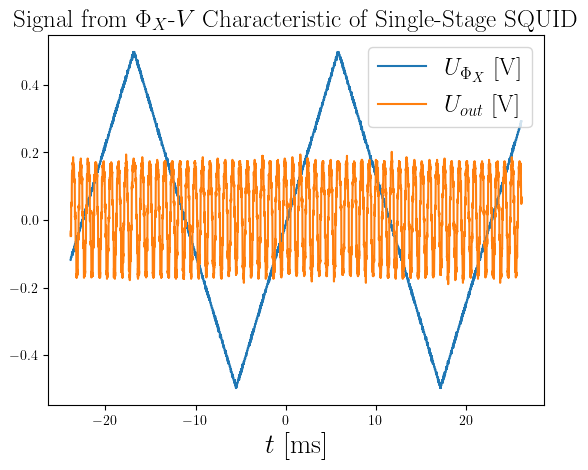

0.4975394 -0.4975394
U_peak-to-peak = 0.995
R = 0.00829


In [508]:
%matplotlib inline
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
flux_B= data_phi.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
signal_B = data_phi.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
signal_B = signal_B/100 #V

t_i = 0
t_f = -1
plt.plot(time_B[t_i:t_f],flux_B[t_i:t_f], label =r"$U_{\Phi_X}$ [V]")
plt.plot(time_B[t_i:t_f],signal_B[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Signal from $\Phi_X$-$V$ Characteristic of Single-Stage SQUID", fontsize =18)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(np.max(flux_B[t_i:t_f]), np.min(flux_B[t_i:t_f]))
print(r"U_peak-to-peak = {:.3}".format(np.max(flux_B[t_i:t_f]) -np.min(flux_B[t_i:t_f])))
print(r"R = {:.3}".format((np.max(flux_B[t_i:t_f]) -np.min(flux_B[t_i:t_f]))/120))

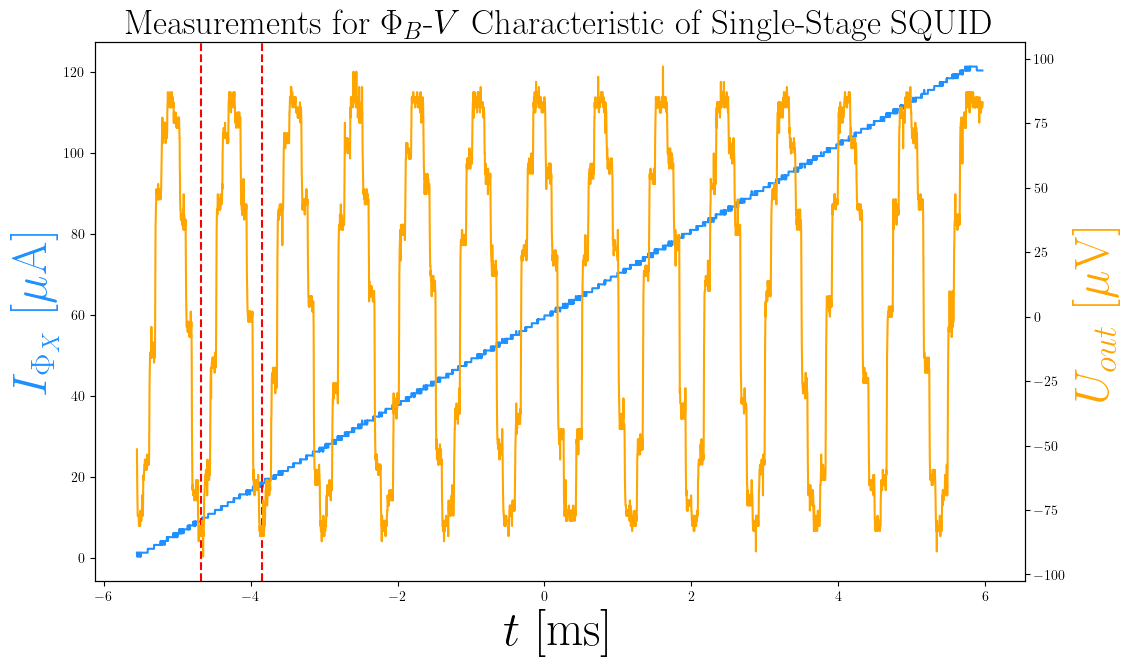

In [484]:
# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]

t_i = 8936
t_f = 14559

R = 0.995/120.98e-6 #Ohm
current = (flux_B + 0.5*np.ones_like(flux_B))/R*10**6
#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal_B[t_i:t_f], 2)[:2]
t_1, t_2 = time_B[t_i -13+ min_ind[0]], time_B[t_i +392+ min_ind[0]] #shift the found values to match the position
#of the minima visually. 
dt_B  = t_2 - t_1 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measurements for $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_B[t_i:t_f],current[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')

ax.set_xlabel(r'$t$ [ms]', size = 35)
ax.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 35, color="dodgerblue")


ax2 = ax.twinx()
ax2.plot(time_B[t_i:t_f],signal_B[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 35, color="orange")
plt.show()

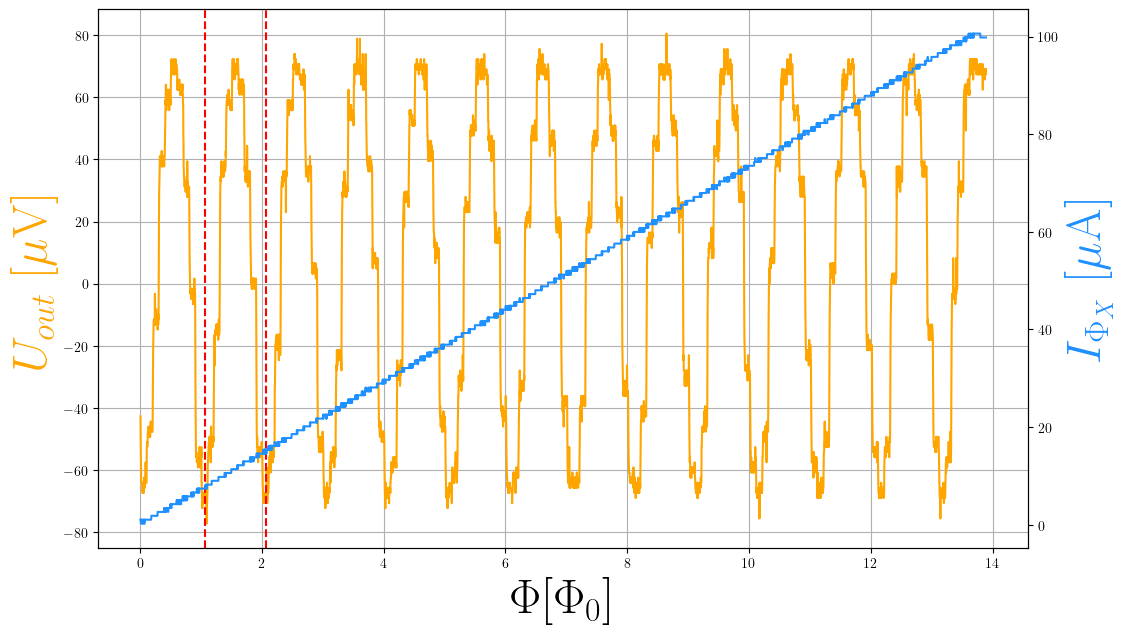

0.8294399800000001


In [486]:
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
time_B = time_B/dt_B #normalize x-Axis
time_B = time_B+6.7
t_1, t_2 = time_B[t_i -13+ min_ind[0]], time_B[t_i +392+ min_ind[0]] #shift the found values to match the position

#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
#plt.title(r"$\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)

ax.plot(time_B[t_i:t_f],dt_B*signal_B[t_i:t_f]/a*10**6, color="orange")
ax.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 35, color="orange")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')
ax.grid()

ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 35)
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_B[t_i:t_f],dt_B*current[t_i:t_f], color="dodgerblue")
ax2.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 35, color="dodgerblue")

plt.savefig("phiX_V_characteristic.png")
plt.show()
print(dt_B)

In [351]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
time_fit = time_B[t_i:t_f]
current_fit = dt_B*current[t_i:t_f] 
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t1,t0):
    return t1*x+t0

chi_2 = cost.LeastSquares(time_fit, current_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t1=0,t0=0)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 579.8 (χ²/ndof = 0.1)      │              Nfcn = 72               │
│ EDM = 5.11e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t1   │  7.3360   │  0.0033   │  -0.0033   │   0.0033   │         │         │       │
│ 1 │ t0   │   0.023   │   0.027   │   -0.027   │   0.027    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t1           │          t0           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.0033  │  0.0033   │  -0.027   │   0.027   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────┐
│    │        t1        t0 │
├────┼─────────────────────┤
│ t1 │  1.11e-05 -0.077e-3 │
│ t0 │ -0.077e-3  0.000713 │
└────┴─────────────────────┘

From the fit we are able to determine:
$$M^{-1}_{IN} = (7.3385\pm 0.0017)\,\,\mu \textrm{A}\Phi_0^{-1} .$$

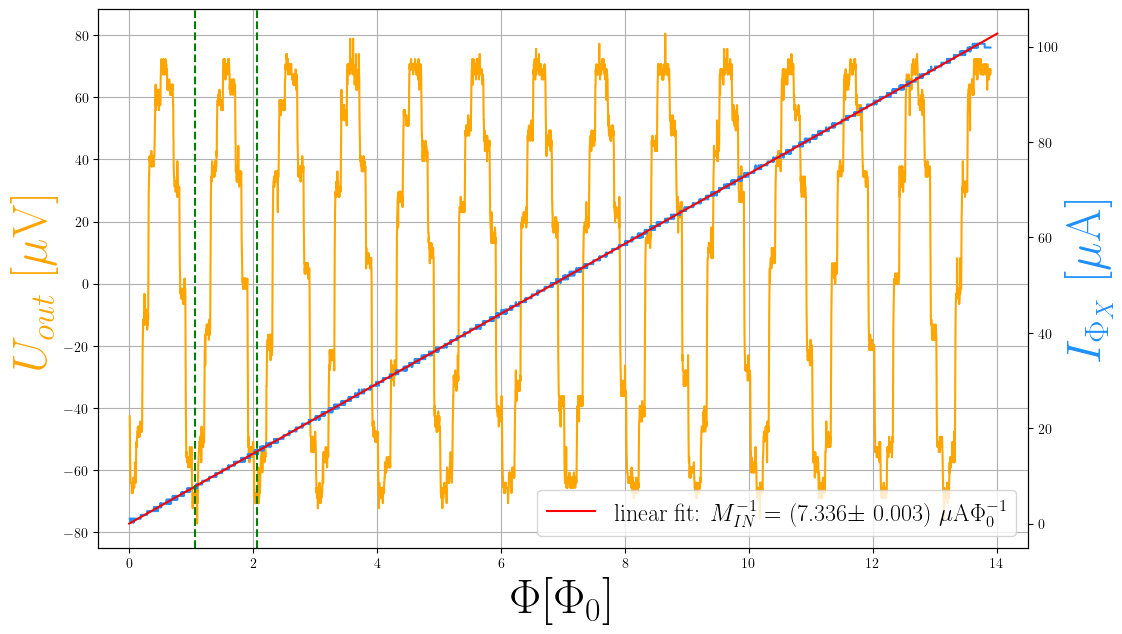

0.8294399800000001


In [353]:
time_B = data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
time_B = time_B/dt_B #normalize x-Axis
time_B = time_B+6.7
t_1, t_2 = time_B[t_i -13+ min_ind[0]], time_B[t_i +392+ min_ind[0]] #shift the found values to match the position

#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
#plt.title(r"$\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time_B[t_i:t_f],dt_B*signal_B[t_i:t_f]/a*10**6, color="orange")
ax.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 35, color="orange")
ax.grid()
ax.set_xlim(-0.5,14.5)
ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 35)

#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time_B[t_i:t_f],dt_B*current[t_i:t_f], color="dodgerblue")
phi_fit = np.linspace(0,14,1000)
ax2.plot(phi_fit, linear(phi_fit,7.3360,0.023), color="red", 
         label=r"linear fit: $M_{{IN}}^{{-1}}$ = (7.336$\pm$ 0.003) $\mu$A$\Phi_0^{{-1}}$")
ax2.axvline(t_1, ls = '--', color='green')
ax2.axvline(t_2, ls = '--', color='green')
ax2.set_ylabel(r'$I_{\Phi_X}$ [$\mu$A]', size = 35, color="dodgerblue")
ax2.legend(fontsize="xx-large")
plt.savefig("phiB_V_characteristic_witghfit.png")
plt.show()
print(dt_B)

### 5.2.2 Flux Locked Loop

In the next section of the experiment, we analyze the SQUID in the FLL mode. We measure the output voltage generated signal by a triangular signal. From this measurements, we aim to determine the amplification of the circuit using Eq. 50 of the lab's introduction:
$$ \Delta U_{out} = -R_F\frac{M_{IN}}{M_{\Phi_B}}\Delta I_{IN}.$$

Using this equation, we can estimate two values for the amplification, one graphically by fitting a linear function to voltage-current curve and taking the negative slope. To get a second value we can use the values we found in $5.2.1$. We start with the graphical method.

We transformt he measured voltage from channel A as we have done in the past. Afterwards, we use performe a linear fit to the U-I curve. 

Fig. 3: Measured $U_{Signal}$ and $U_{out}$ from double-stage SQUID
   <img src="Measurements/5.2/522_FLL.png" alt="FLL_workingpoint.png">

In [376]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.2/FLL_workingpoint/FLL_workingpoint_2.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A    Channel B
           (ms)          (V)          (V)
0  -95,40671855  -0,42645790  -0,04736713
1  -95,39855855  -0,42645790  -0,06317668
2  -95,39039855  -0,42645790  -0,06317668
3  -95,38223855  -0,42645790  -0,06317668
4  -95,37407855  -0,42645790  -0,06317668

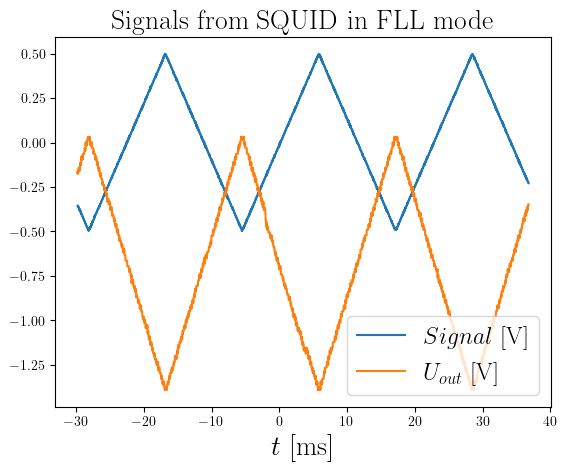

Signal_max = 0.498, Signal_min = -0.498
U_peak-to-peak = 0.995
R = 3.33e+05


In [378]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
u_out = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [V]

signal = signal
t_i = 8039
t_f = 16201
plt.plot(time[t_i:t_f],signal[t_i:t_f], label =r"$Signal$ [V]")
plt.plot(time[t_i:t_f],u_out[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Signals from SQUID in FLL mode", fontsize =20)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()
print(r"Signal_max = {:.3}, Signal_min = {:.3}".format(np.max(signal[t_i:t_f]), np.min(signal[t_i:t_f])))
print(r"U_peak-to-peak = {:.3}".format(np.max(signal[t_i:t_f]) -np.min(signal[t_i:t_f])))
print(r"R = {:.3}".format((np.max(signal[t_i:t_f]) -np.min(signal[t_i:t_f]))/2.99e-6))

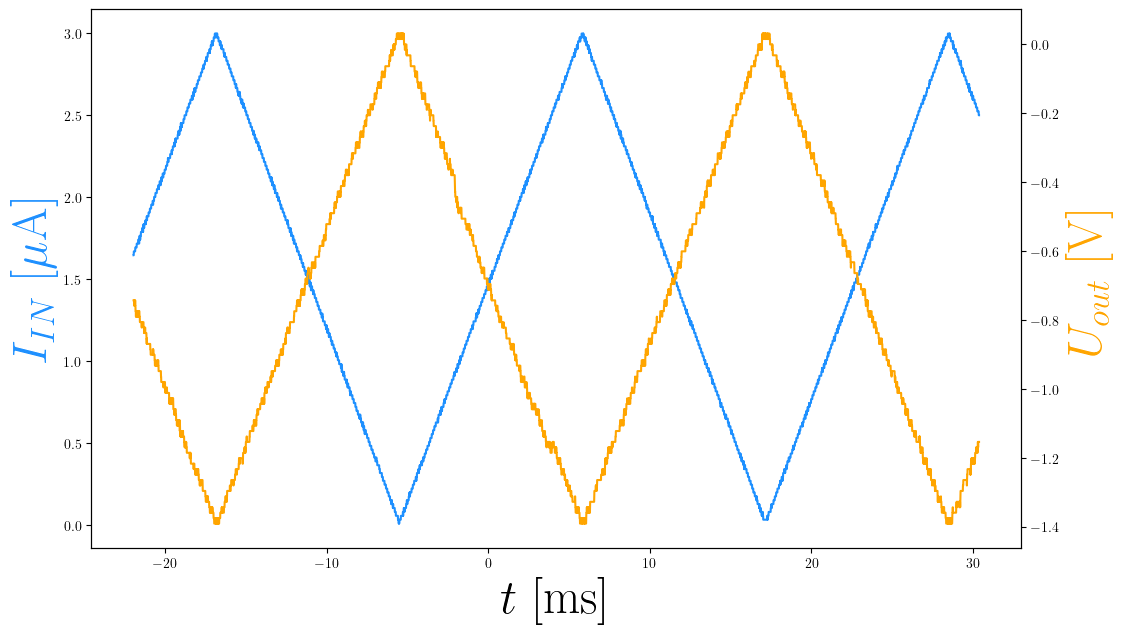

In [382]:
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
R = 0.995/2.99e-6
current = (signal+0.5)/R*10**6 # mA
t_i = 9000
t_f = 15415

fig,ax = plt.subplots(figsize = (12, 7))
#plt.title(r"Measured $I_{IN}$ and $U_{out}$ from single-stage SQUID in FLL mode", size = 25)
ax.plot(time[t_i:t_f],current[t_i:t_f], color="dodgerblue")


ax.set_xlabel(r'$t$ [ms]', size = 35)
ax.set_ylabel(r'$I_{IN}$ [$\mu$A]', size = 35, color="dodgerblue")


ax2 = ax.twinx()
ax2.plot(time[t_i:t_f],u_out[t_i:t_f], color="orange")
ax2.set_ylabel(r"$U_{out}$ [V]", size = 35, color="orange")
plt.savefig("I_and_U_FLL_extended.png")
#plt.xlim(-5,0)
plt.show()

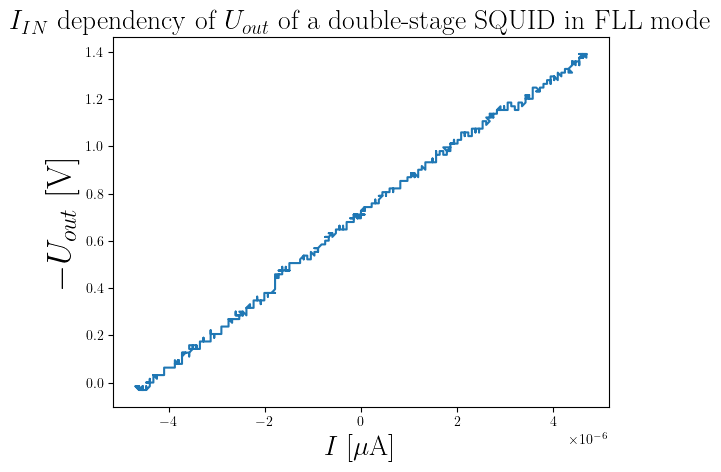

In [308]:
r = 0.106e6
plt.plot(signal[t_i:t_f]/r,-u_out[t_i:t_f])
plt.title(r"$I_{IN}$ dependency of $U_{out}$ of a double-stage SQUID in FLL mode", fontsize =20)
plt.xlabel(r"$I$ [$\mu$A]", fontsize = 20)
plt.ylabel(r"$-U_{out}$  [V]", fontsize = 25)
#plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

In [309]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
current_fit = current[t_i:t_f]
u_fit = -u_out[t_i:t_f]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(current_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.721 (χ²/ndof = 0.0)      │              Nfcn = 64               │
│ EDM = 7.02e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   -0.03   │   0.05    │   -0.05    │    0.05    │         │         │       │
│ 1 │ t1   │   0.485   │   0.030   │   -0.030   │   0.030    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.05   │   0.05    │   -0.03   │   0.03    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │  0.00277  -1.4e-3 │
│ t1 │  -1.4e-3 0.000916 │
└────┴───────────────────┘

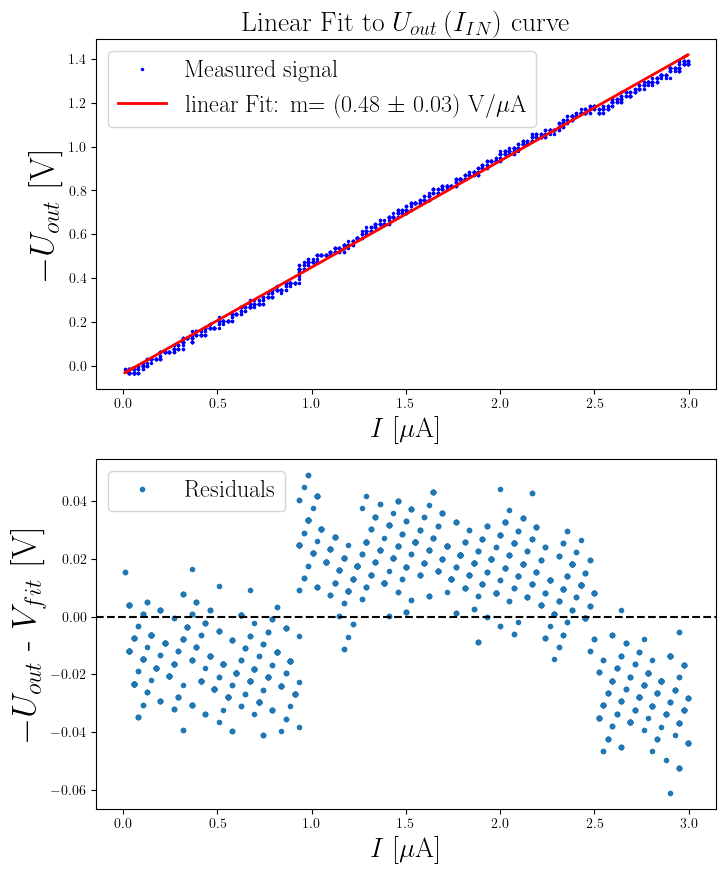

In [321]:
# Plot the data and the fitted model
import matplotlib.pyplot as plt
%matplotlib inline
t0_fit, t1_fit = minuit.values['t0'], minuit.values['t1']
fig, axs = plt.subplots(2, 1, figsize=(8,10))


axs[0].plot(current_fit, u_fit,'b.', markersize=3, label = "Measured signal")
axs[0].plot(current_fit, linear(current_fit, t0_fit, t1_fit), '-', 
            label=r'linear Fit: m= ({:.2f} $\pm$ 0.03) V/$\mu$A'.format(t1_fit), 
            
            linewidth=2, color = "red")
axs[0].set_title(r"Linear Fit to $U_{out}\left( I_{{IN}} \right)$ curve", fontsize=20)
axs[0].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[0].set_ylabel(r"$-U_{{out}}$ [V]", fontsize=25)
axs[0].legend(fontsize='xx-large', loc='best')
#axs[0].grid(True)


#plot residuals
residuals = u_fit - linear(current_fit, t0_fit, t1_fit)
axs[1].plot(current_fit, residuals, 'o', label="Residuals", markersize=3)
axs[1].axhline(0, color='black', linestyle='--')
#axs[1].set_title("Residuals of the Linear Fit", fontsize=20)
axs[1].set_xlabel(r"$I$ [$\mu$A]", fontsize = 20)
axs[1].set_ylabel(r"$-U_{{out}}$ - $V_{fit}$ [V]", fontsize=25)
axs[1].legend(fontsize='xx-large', loc='best')
#axs[1].grid(True)
plt.savefig("mUout_I_Curve_fit.png")
plt.show()

Graphically we find $$m_{exp} = R_F\frac{M_{IN}}{M_{\Phi_B}} = (0.48\pm 0.03) \,\, V \mu\textrm{A}^{-1}$$

Now, we use the previously determined mutual inductances to estimate a second value of the amplification. From $\texttt{SQUISViwer}$ we read that our $R_F = 100$ k$\Omega$ = $0.1$ V/$\mu$A. Since no error explicitly given for this resistances we will disregard its contribution to the uncertainty. 

To determine a statistical error we use gaussian error propagation and assume that all variables in the definition of the amplification are uncorrelated. The error of the amplifcation reads:
$$ \Delta m = m\sqrt{\left(\frac{(\Delta M_{IN})_{err}}{\Delta M_{IN}}\right)^2 +\left(\frac{(\Delta M_{\Phi_B})_{err}}{\Delta M_{\Phi_B}}\right)^2 } $$ 



In [514]:
m= 1/(7.336)*42.970*0.1
dm =m*np.sqrt((0.016/42.970)**2+(0.003/7.336)**2)*0.1
print(r"m = {:.6f} $\pm$ {:.6f}".format(m,dm))
print(r" $\sigma$ = {:.3f}".format(np.abs(0.48-0.587327)/np.sqrt((0.03)**2+(0.000017)**2)))

m = 0.585742 $\pm$ 0.000032
 $\sigma$ = 3.578


From this second method, we get: $$m_{theo} = (0.587327\pm 0.000017) \,\, V \mu\textrm{A}^{-1}.$$

 The statistical deviation between both vales is: $$\sigma = 3.58.$$
 Thus the difference between both values lays out of the confidence interval, $3\sigma$ and hints at error which were not taking into account or systematic error. We will discuss probabble error sources later. 

### 5.2.3 SQUID Noise

Lastly, we measure the noise spectrum in FLL mode while changing the the gain-bandwidth-production (GBP). We find out, that as the GBP increases, the spectrum develops resonances which tells uns that the stability of the signal is decreasing and the deviace is not able to take sensible measurements any longer. The resonances start to form at $GBP = 16$ GHz. 

Fig.3 : Measured Spectrum from single-stage SQUID in FLL mode and parameters used for the meausrement.
   <img src="Measurements/5.2/Spectrum.png" alt="Spectrum.png">

## 5.3 Two-stages SQUID Readout

In [325]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.3/V_Phix_bothSQUIDS_tunned/V_Phix_bothSQUIDS_tunned_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Time    Channel A     Channel C
           (ms)          (V)          (mV)
0  -95,40671855  -0,21321360  264,85600000
1  -95,39855855  -0,21321360  264,85600000
2  -95,39039855  -0,21321360  264,85600000
3  -95,38223855  -0,21321360  264,85600000
4  -95,37407855  -0,21321360  264,85600000

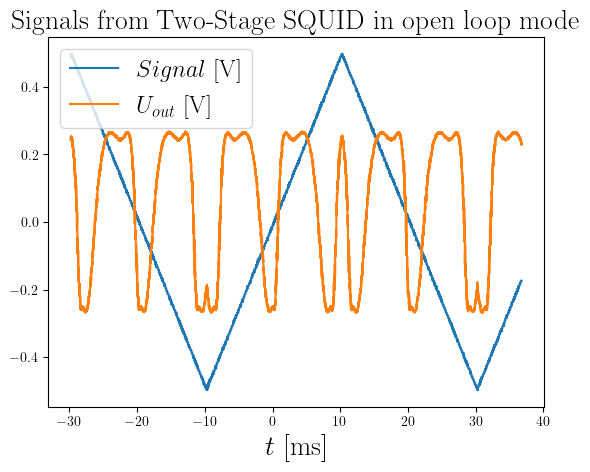

In [327]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]
u_out = data.iloc[:, 2].str.replace(',', '.', regex=False).astype(float).values # [mV]
u_out = u_out/1000

t_i = 8039
t_f = 16201
plt.plot(time[t_i:t_f],signal[t_i:t_f], label =r"$Signal$ [V]")
plt.plot(time[t_i:t_f],u_out[t_i:t_f], label =r"$U_{out}$ [V]")
plt.title(r"Signals from Two-Stage SQUID in open loop mode", fontsize =20)
plt.xlabel(r"$t$ [ms]", fontsize = 20)
#plt.ylabel(r"$V$ [mV]", fontsize = 25)
plt.legend( fontsize='xx-large', loc = 'best')
plt.show()

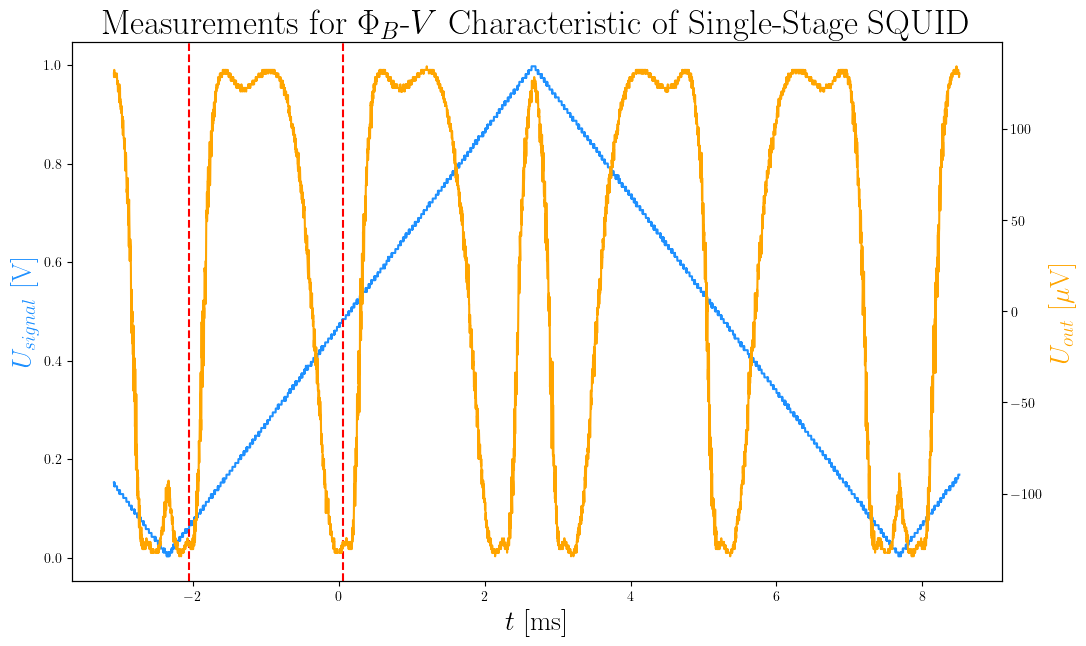

In [329]:

# plot signal
%matplotlib inline
import matplotlib.pyplot as plt
time= data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]

t_i = 10139
t_f = 15801

#normalize t_axis 
#1. find first and second minima to normalize x-axis
min_ind = np.argpartition(signal[t_i:t_f], 2)[:2]
t_1, t_2 = time[t_i +150+ min_ind[0]], time[t_i +1179+ min_ind[0]] #shift the found values to match the position
#of the minima visually. 
dt = t_2 - t_1 
#plot signals
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"Measurements for $\Phi_B$-$V$ Characteristic of Single-Stage SQUID", size = 25)
ax.plot(time[t_i:t_f],signal[t_i:t_f]+0.5, color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')

ax.set_xlabel(r'$t$ [ms]', size = 20)
ax.set_ylabel(r'$U_{signal}$ [V]', size = 20, color="dodgerblue")


ax2 = ax.twinx()
ax2.plot(time[t_i:t_f],u_out[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")
#plt.xlim(-5,0)
plt.show()

We assume, that in the case of the double-stage SQUID each minima represents a flux-change of one integer, $n\to n+1$, thus we estimate the distance of the minima and normalize the x-axis it was done in $5.2.2$. In this fashion, we get the $\Phi-V$ characteristic of the double-stage SQUID

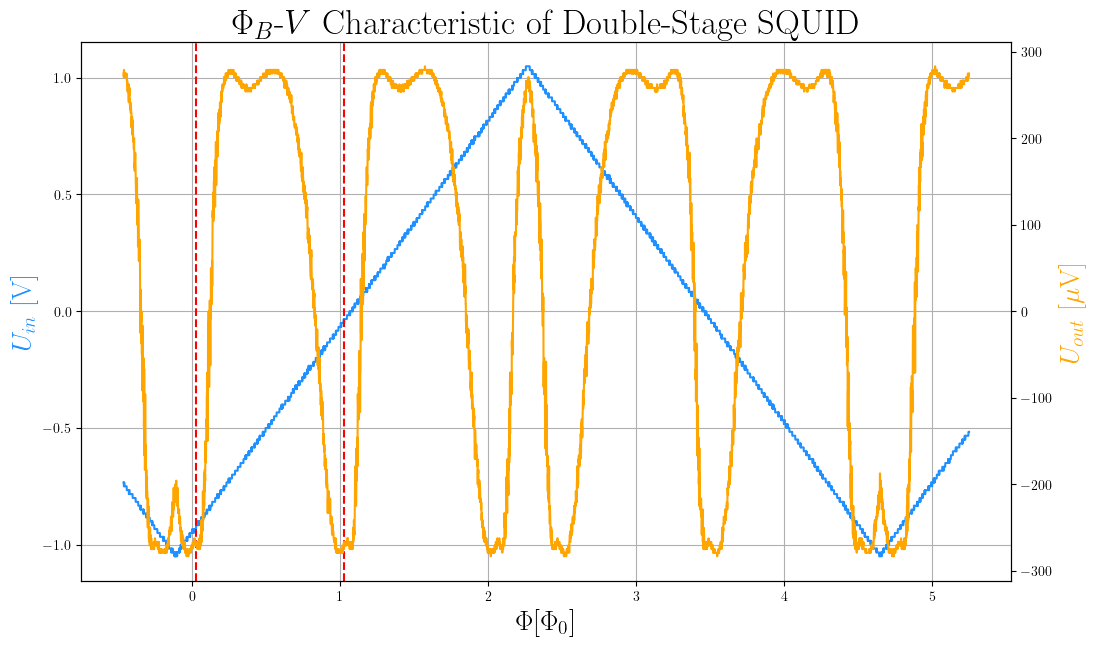

0.8294399800000001


In [336]:
time= data_phi.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
time = time/dt #normalize x-Axis
time= time+1
t_1, t_2 = time[t_i +150+min_ind[0]], time[t_i +1179+ min_ind[0]] #shift the found values to match the position

#plot signals
t_i = 10139
t_f = 16018
fig,ax = plt.subplots(figsize = (12, 7))
plt.title(r"$\Phi_B$-$V$ Characteristic of Double-Stage SQUID", size = 25)
ax.plot(time[t_i:t_f],dt*signal[t_i:t_f], color="dodgerblue")
ax.axvline(t_1, ls = '--', color='red')
ax.axvline(t_2, ls = '--', color='red')
ax.grid()

ax.set_xlabel(r'$\Phi[\Phi_0]$', size = 20)
ax.set_ylabel(r'$U_{in}$ [V]', size = 20, color="dodgerblue")
#ax.axvline(c[time1_X], ls = '--')
#ax.axvline(c[time2_X], ls = '--')

ax2 = ax.twinx()
ax2.plot(time[t_i:t_f],dt*u_out[t_i:t_f]/a*10**6, color="orange")
ax2.set_ylabel(r"$U_{out}$ [$\mu$V]", size = 20, color="orange")
plt.savefig("phiB_V_doublestageSQUID.png")
plt.show()
print(dt_B)

In the next part of our experient, we are interested in using the double-stage SQUID to measure the temperature of liquid $He$. For this we measured the spectrum of the double-stage SQUID which represents the voltage spectral density $S_V (f)$ [dBV]. For the temperature measurement we use Eq. 46 from the lab's introducton:

$$ S_I(f) = \dfrac{4 k_B T}{R} \dfrac{1}{1 + \frac{f^2}{f_c^2}}. $$

First, we transform our measurement into $\sqrt{S_V}$ using: $$\sqrt{S_V} = \frac{1}{\Delta f}10^{U/20} = \frac{1}{\Delta f}e^{U/20\log (10)}$$


transfrome our measurements into the desired qunatity, we use the amplificatoin factor found in $5.2.2$, $m_{exp} = (0.48\pm 0.03) \,\, V \mu\textrm{A}^{-1}$, to transfom  $\sqrt{S_V} \to \sqrt{S_I} = m^{-1}\sqrt{S_V}$.

Fig. 4: Measured spectrum from double-stage SQUID and paramters used for its measurement.
   <img src="Measurements/5.3/Spectrum.png" alt="Spectrum.png">

In [390]:
#create a dataframe of saves file using pandas
data = pd.read_csv("Measurements/5.3/Spectrum/Spectrum_1.csv", sep = ";", skiprows=[2], header=[0,1])
data.head()

Frequency     Channel C
        (MHz)         (dBV)
0  0,00000000  -47,80024000
1  0,00023842  -50,76292000
2  0,00047684  -58,74775000
3  0,00071526  -68,02427000
4  0,00095367  -68,48038000

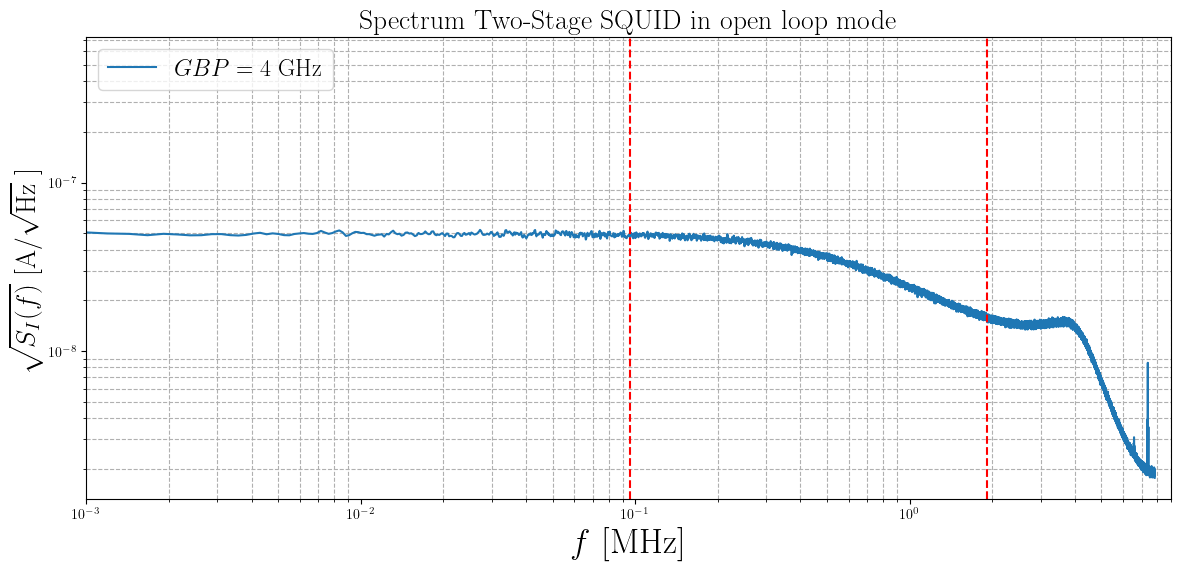

[1.64890898e-02 1.17236456e-02 4.67542595e-03 ... 5.53031900e-05
 5.48269621e-05 5.30995307e-05]


In [392]:
#Convert values into floats
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [ms]
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [V]

amp_exp,damp_exp = 0.48e6,0.03e6 #V/Amp
df = np.abs(time[1]-time[2])
s_v = 10**(signal/20)/np.sqrt(df)
ds_v = s_v*np.log(10)/20*0.0001
s_i = s_v/amp_exp 
ds_i = s_v*np.sqrt((damp_exp/amp_exp)**2+(ds_v/s_v)**2)

plt.figure(figsize=(14,6))
plt.grid(visible = True, which = 'major', linewidth=1.3)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.plot(time,s_i, label =r"$GBP = 4$ GHz")
plt.axvline(time[8000], ls = '--', color='red')
plt.axvline(time[400], ls = '--', color='red')


#plt.errorbar(time,s_i,ds_i, label =r"$Signal$ [mV]")

plt.title(r"Spectrum  Two-Stage SQUID in open loop mode", fontsize =20)
plt.ylabel(r"$\sqrt{S_I(f)}$ [A/$\sqrt{\textrm{Hz}}$ ]", fontsize = 20)
plt.xlabel(r"$f$ [MHz]", fontsize = 25)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001,9)
plt.legend( fontsize='xx-large', loc = 'best')
plt.grid()
plt.show()
print(ds_i)

In [394]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost
import scipy.constants as const
t_i = 400
t_f = 8000
f_fit = time[t_i:t_f]
si_fit = s_i[t_i:t_f]
sigma = ds_i[t_i:t_f]
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def sqrt_si(f, T,R):
    L = 2.9e-9 #H
    f_c = R / (2 * np.pi * L)  
    thermal_noise = (4 * const.k * T) / R  # Thermal noise factor
    denominator = 1 + (f ** 2) / (f_c ** 2)
    s = np.sqrt(np.clip(thermal_noise / denominator, a_min=0, a_max=None))
    return s
    
chi_2 = cost.LeastSquares(f_fit, si_fit, 10**(-12)*np.ones_like(si_fit), model = sqrt_si)
sqrt_si.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, T = 0.4, R=0.01)
minuit.limits = {"T": (0.1,7), "R": (0.001, 2)}  # Physical bounds for T and R
minuit.errors = {"T": 0.5, "R": 0.01}  # Initial step sizes
minuit.strategy = 0  
minuit.migrad()
if minuit.valid:
    minuit.minos()
    print(minuit.params)  # Display results
else:
    print("Fit did not converge. Check parameter guesses and data scaling.")

KeyboardInterrupt: 

In [40]:
print(const.k)

1.380649e-23


<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_48860\81777134.py:33: SyntaxWarning: invalid escape sequence '\p'
  label='Fit: \n $T$ = ({:.3f} $\pm$ {:.3f}) $K$  \n $R$ = ({:.3f} $\pm$ {:.3f}) $\Omega$'.format(popt_T, pcov_T, popt_R,pcov_R),


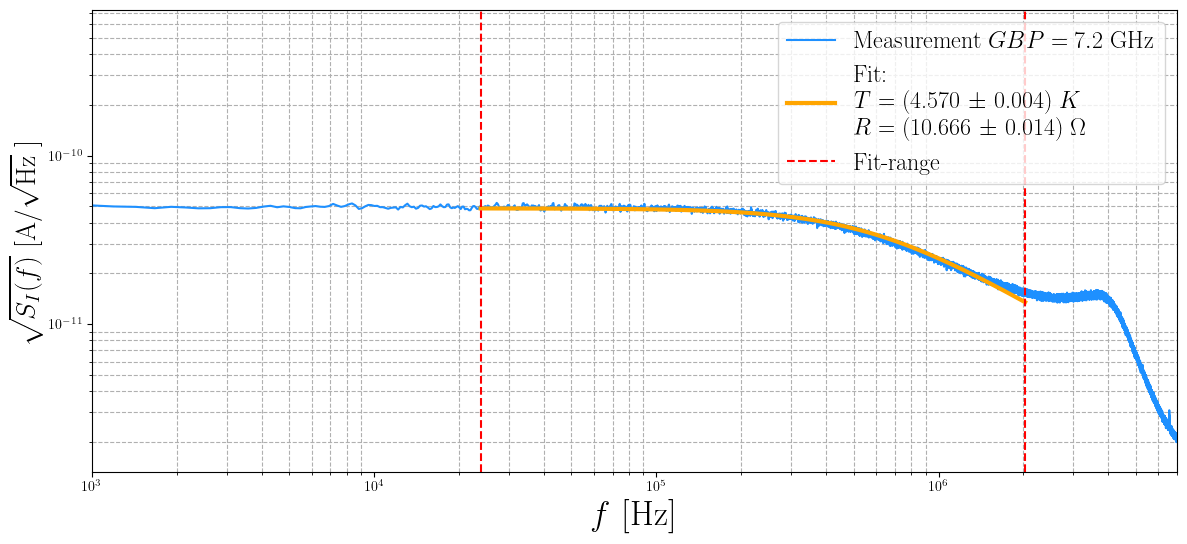

In [404]:
#Convert values into floats
from scipy.optimize import curve_fit
time = data.iloc[:, 0].str.replace(',', '.', regex=False).astype(float).values  # [Mhz]
time = time*10**(6) # Hz
signal= data.iloc[:, 1].str.replace(',', '.', regex=False).astype(float).values # [dBV]

amp_exp,damp_exp = 0.48e6,0.03e6 #V/Amp
df = np.abs(time[1]-time[2])
s_v = 10**(signal/20)/np.sqrt(df) #V
ds_v = s_v*np.log(10)/20
s_i = s_v/amp_exp #A
ds_i = s_v*np.sqrt((damp_exp/amp_exp)**2+(ds_v/s_v)**2)

#fit 
t_i = 100
t_f = 8500
f_fit = time[t_i:t_f]
si_fit = s_i[t_i:t_f]
sigma = ds_i[t_i:t_f]
popt, pcov = curve_fit(sqrt_si, f_fit, si_fit)
popt_T = popt[0]*10
pcov_T = np.sqrt(pcov[0, 0])*10  #check why we need to multiply the fit parameters
popt_R = popt[1]*1000
pcov_R = np.sqrt(pcov[1, 1])*1000

plt.figure(figsize=(14,6))
plt.grid(visible = True, which = 'major', linewidth=1.3)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.plot(time, s_i, color = 'dodgerblue', 
         label = 'Measurement $GBP=7.2$ GHz')
plt.plot(f_fit, sqrt_si(f_fit, *popt),
         label='Fit: \n $T$ = ({:.3f} $\pm$ {:.3f}) $K$  \n $R$ = ({:.3f} $\pm$ {:.3f}) $\Omega$'.format(popt_T, pcov_T, popt_R,pcov_R),
         color = 'orange', linewidth = 3)
plt.axvline(time[t_i], ls = '--', color='red', label='Fit-range')
plt.axvline(time[t_f], ls = '--', color='red')

#plt.title(r"Spectrum  Two-Stage SQUID in open loop mode", fontsize =20)
plt.ylabel(r"$\sqrt{S_I(f)}$ [A/$\sqrt{\textrm{Hz}}$ ]", fontsize = 20)
plt.xlabel(r"$f$ [Hz]", fontsize = 25)
plt.xscale("log")
plt.yscale("log")
plt.legend( fontsize='xx-large', loc = 'best')
plt.xlim(1e3,7e6)
plt.grid()
plt.savefig("sqrtSI.png")
plt.show()


In [50]:
print("T = ({:.3} +/- {:.3})K".format(popt_T, pcov_T))
print(r"R = ({:.3} +/- {:.3}) \Omega ".format(popt_R, pcov_R))

T = (4.57 +/- 0.00373)K
R = (10.7 +/- 0.0139) \Omega 


### Summary
We started this lab, by examining the resistances of the SQUID setup, by measureing them over different components at room temperature and cooled.
We see that the resistance drops significantly when cooled with helium, but the measurement does not reach 0, due to the resistance of the external cables. 

In the following we further examined the single, and two stage SQUIDs.

For the single stage SQUID we plotted the current voltage characteristics, and determined the resistance of the normal conducting SQUID to be: $R = 0.0199$.
Further the resistance of a single Josephson Junction to be:
$G_N = ( 3.776 \pm 0.004)\, \Omega $
and a critical current of $I_C = 20\mu A$.

Examining the inverse mutual Inductance from the flux voltage characteristics yields: 
$M^{-1}_{\Phi_B} = (43.101\pm 0.008)\,\,\mu \textrm{A}\Phi_0^{-1} $ and 
$M^{-1}_{IN} = (7.3385\pm 0.0017)\,\,\mu \textrm{A}\Phi_0^{-1} $.

In the next section we switch from an open loop configuration to a flux locked loop setup and caluculate the expected ampflification experimentally and theotically: $m_{exp} = R_F\frac{M_{IN}}{M_{\Phi_B}} = (0.48\pm 0.03) \,\, V \mu\textrm{A}^{-1}$ and $m_{theo} = (0.587327\pm 0.000017) \,\, V \mu\textrm{A}^{-1}$, which deviate significantly from one another, with a $\sigma$ of $3.578$.

In the last part using the single stage SQUID, we look at the noise at different gain-bandwidth-products (GBP), and find that at a value around $GBP = 16GHz$ we start to observe resonances.

We switch to a two stage SQUID and start of by plotting the $V-\Phi$ characteristic, for which we optimized some of the parameters. 
Then using the flux locked loop, examining the noise, we determined the temperature of the probe to be: $T = \left(4.57 \pm 0.00373\right)K$ and a resistance of: $R = \left(12.499 \pm 0.05\right)\Omega$

### Critical Diskussion
The significant drop in resistance is a solid indication for the SQUID becoming superconducting, while the non zero magnitude is explained via the resistance of the external cables.

The measurement of the voltage-current characteristic yielded the difference between hole, and half integer flux-quanta, which is consistent with the expected quantized behavior.


We do observe a significant deviation between the theoreticaly expected and experimentaly measured ampflication. 

Significant deviations might arrise due to multiple reasons, while one major factor could be that we do not include any systematic errors, with the statistical errors being rather small, any difference in the result will show in a more significant $\sigma$ value. 

The calculated values for the temperature $T = \left(4.57\pm0.00373\right)K$ is consistent with the expected temperature of liquid helium around $4.2K$. 

Some problems while conducting the measurments were due to choosing unfit Voltages, either too high or too low, to see certain behaviors or effects. Although these were able to be resolved with help of the tutor. A higher emphisis might be helpfull for certain measurments. 